# **1. Import Data**

In [ ]:
from google.colab import files
import io  
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.set_option('display.max_columns',1000)


In [ ]:
uploaded = files.upload()

Saving 10ClientServerNormal.csv to 10ClientServerNormal.csv
Saving pingAttack.csv to pingAttack.csv
Saving udpFlood.csv to udpFlood.csv


In [ ]:
normal_df = pd.read_csv(io.BytesIO(uploaded['10ClientServerNormal.csv']))
ping_df = pd.read_csv(io.BytesIO(uploaded['pingAttack.csv']))
udp_flood_df = pd.read_csv(io.BytesIO(uploaded['udpFlood.csv']))

print(normal_df.shape)
print(ping_df.shape)
print(udp_flood_df.shape)

(13249, 100)
(208, 100)
(1319, 100)


# **2. Data Preprocessing**

## 2.1 Merge Datasets

In [ ]:
#normal_df = normal_df.loc[0:207]
#udp_flood_df = udp_flood_df.loc[0:207]

df = pd.concat([normal_df, udp_flood_df, ping_df])
df.head()

,Session Key,Protocol,Src IP,Src Port,Dst IP,Dst Port,Init Ts,Last Ts,Ts,Duration,Mac Addr,Label,Fwd Pkt Len Min,Fwd Pkt Len Max,Fwd Pkt Len Sum,Fwd Pkt Len Ave,Fwd Pkt Len Std,Bwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Sum,Bwd Pkt Len Ave,Bwd Pkt Len Std,Flow Pkt Len Min,Flow Pkt Len Max,Flow Pkt Len Ave,Flow Pkt Len Std,Fwd Pkt Num,Bwd Pkt Num,F/Bwd Pkt Ratio,Fwd Pkt Speed,Bwd Pkt Speed,Fwd Byte Num,Bwd Byte Num,F/Bwd Byte Ratio,Fwd Byte Speed,Bwd Byte Speed,Fwd Flag Ack Num,Bwd Flag Ack Num,F/Bwd Flag Ack Ratio,Fwd Flag Ack Speed,Bwd Flag Ack Speed,Fwd Flag Cwr Num,Bwd Flag Cwr Num,F/Bwd Flag Cwr Ratio,Fwd Flag Cwr Speed,Bwd Flag Cwr Speed,Fwd Flag Ecn Num,Bwd Flag Ecn Num,F/Bwd Flag Ecn Ratio,Fwd Flag Ecn Speed,Bwd Flag Ecn Speed,Fwd Flag Fin Num,Bwd Flag Fin Num,F/Bwd Flag Fin Ratio,Fwd Flag Fin Speed,Bwd Flag Fin Speed,Fwd Flag Ns Num,Bwd Flag Ns Num,F/Bwd Flag Ns Ratio,Fwd Flag Ns Speed,Bwd Flag Ns Speed,Fwd Flag Push Num,Bwd Flag Push Num,F/Bwd Flag Push Ratio,Fwd Flag Push Speed,Bwd Flag Push Speed,Fwd Flag Res Num,Bwd Flag Res Num,F/Bwd Flag Res Ratio,Fwd Flag Res Speed,Bwd Flag Res Speed,Fwd Flag Reset Num,Bwd Flag Reset Num,F/Bwd Flag Reset Ratio,Fwd Flag Reset Speed,Bwd Flag Reset Speed,Fwd Flag Syn Num,Bwd Flag Syn Num,F/Bwd Flag Syn Ratio,Fwd Flag Syn Speed,Bwd Flag Syn Speed,Fwd Flag Urg Num,Bwd Flag Urg Num,F/Bwd Flag Urg Ratio,Fwd Flag Urg Speed,Bwd Flag Urg Speed,Fwd IAT Min,Fwd IAT Max,Fwd IAT Sum,Fwd IAT Ave,Fwd IAT Std,Bwd IAT Min,Bwd IAT Max,Bwd IAT Sum,Bwd IAT Ave,Bwd IAT Std,Flow IAT Min,Flow IAT Max,Flow IAT Ave,Flow IAT Std
0,ICMPv6 ::201:1:1:1 0 ::205:5:5:5 0 155 2,ICMPv6,::201:1:1:1,0,::205:5:5:5,0,48:50.3,48:50.3,1.622580e+15,0,"{'00:01:00:01:00:01:00:01', '00:05:00:05:00:05...",normal,0,0,0,0,0,85,85,85,85,0,85,85,85,0,0,1,0,0.0,0.0,0,85,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ICMPv6 ::201:1:1:1 0 ::205:5:5:5 0 155 3,ICMPv6,::201:1:1:1,0,::205:5:5:5,0,48:50.3,48:50.3,1.622580e+15,0,"{'00:01:00:01:00:01:00:01', '00:05:00:05:00:05...",normal,43,43,43,43,0,0,0,0,0,0,43,43,43,0,1,0,0,0.0,0.0,43,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ICMPv6 ::201:1:1:1 0 ::20a:a:a:a 0 155 2,ICMPv6,::201:1:1:1,0,::20a:a:a:a,0,48:52.4,48:52.4,1.622580e+15,0,"{'00:0a:00:0a:00:0a:00:0a', '00:01:00:01:00:01...",normal,0,0,0,0,0,85,85,85,85,0,85,85,85,0,0,1,0,0.0,0.0,0,85,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ICMPv6 ::201:1:1:1 0 ::20a:a:a:a 0 155 3,ICMPv6,::201:1:1:1,0,::20a:a:a:a,0,48:52.5,48:52.5,1.622580e+15,0,"{'00:0a:00:0a:00:0a:00:0a', '00:01:00:01:00:01...",normal,43,43,43,43,0,0,0,0,0,0,43,43,43,0,1,0,0,0.0,0.0,43,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ICMPv6 ::201:1:1:1 0 ::208:8:8:8 0 155 2,ICMPv6,::201:1:1:1,0,::208:8:8:8,0,48:52.9,48:52.9,1.622580e+15,0,"{'00:01:00:01:00:01:00:01', '00:08:00:08:00:08...",normal,0,0,0,0,0,85,85,85,85,0,85,85,85,0,0,1,0,0.0,0.0,0,85,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.shape)

(14776, 100)


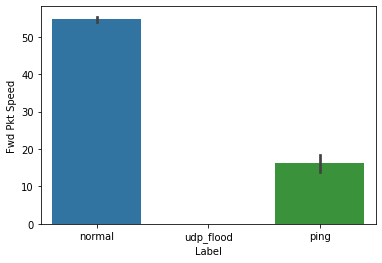

In [ ]:

ax = sns.barplot(x="Label", y="Fwd Pkt Speed", data=df)


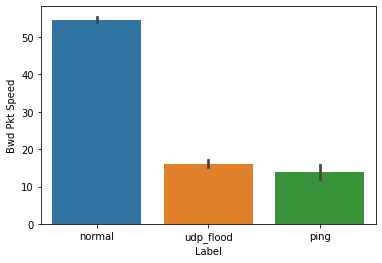

In [ ]:
ax = sns.barplot(x="Label", y="Bwd Pkt Speed", data=df)

## 2.2 Clean and Scaling the Dataset

In [ ]:
drop_column = ['Session Key', 'Protocol', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Init Ts', 'Last Ts', 'Ts', 'Duration', 'Mac Addr','Label']
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
y = df['Label'].values
X = df.drop(columns=drop_column).values
X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
X_normalized = preprocessing.normalize(X, norm='l2')

## 2.3 Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.33)

print(X_train.shape)
print(X_test.shape)

(9899, 88)
(4877, 88)


# **3. Classification**

# **3.1 Random Forest**

We are instantiating a random forest object with 10 decision trees with maximum depth of 1 and using a subset of the data set each time.

Accuracy score:  0.9864670904244413
Precision score:  0.6400331844712376
Recall score:  0.6666666666666666
F1 score:  0.6528818941404536


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


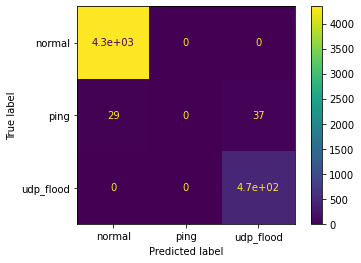

In [ ]:
rf=RandomForestClassifier(n_estimators=10,max_depth=1, random_state=0,bootstrap=True)
rf.fit(X_train,y_train);
predict=rf.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predict)))
# Calculating metrics globally by counting the total true positives, false negatives and false positives.
print('Precision score: ', format(precision_score(y_test, predict,average='macro')))
print('Recall score: ', format(recall_score(y_test, predict,average='macro')))
print('F1 score: ', format(f1_score(y_test, predict,average='macro')))
plot_confusion_matrix(rf,X_test,y_test);

# **3.2 Naive Bayes**

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


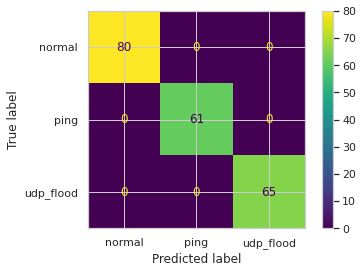

In [ ]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train);
predict=nb.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predict)))
print('Precision score: ', format(precision_score(y_test, predict,average='macro')))
print('Recall score: ', format(recall_score(y_test, predict,average='macro')))
print('F1 score: ', format(f1_score(y_test, predict,average='macro')))
plot_confusion_matrix(nb,X_test,y_test);

# **3.3 Adaboost**

We are instantiating an Adaboost object with 10 decision trees with maximum depth of 1 ( by default).

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


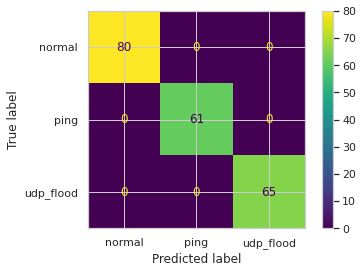

In [ ]:
#https://www.datacamp.com/community/tutorials/adaboost-classifier-python
adaboost_model = AdaBoostClassifier(n_estimators=10,learning_rate=.5,random_state=0)
adaboost_model = adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred,average='macro')))
print('Recall score: ', format(recall_score(y_test, y_pred,average='macro')))
print('F1 score: ', format(f1_score(y_test, y_pred,average='macro')))
plot_confusion_matrix(adaboost_model,X_test,y_test);